#**Ninjacart- CV Classification Business Case**

**Company Overview**

- Ninjacart is India's largest fresh produce supply chain company. They are
  pioneers in solving one of the toughest supply chain problems of the world by
  leveraging innovative technology.
- The biggest challenge Ninjacart faces is to supply fresh products from the
  farmers to the businesses within 12 hours. They need to ensure that the correct vegetables are selected for delivery.
- Ensuring a correct product delivery is an integral component of their   
  automation process, a robust classifier that can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise becomes critical.
- By leveraging data science and Computer vision, Ninjacart can classify various
  vegetables and noises.

**Dataset Explanation: Ninjacart_data**

This dataset contains a folder train, which has a total of 3135 images, split into four folders as follows:
 - Tomato : 789
 - Potato : 898
 - Onion : 849
 - Indian market : 599

This dataset contains another folder test which has a total of 351 images, split into four folders:

 - Tomato : 106
 - Potato : 83
 - Onion : 81
 - Indian market : 81


**Problem Statement**

Assuming you are a data scientist at NinjaCart, you are responsible for analyzing the dataset to develop a program that takes an image as input and recognizes the vegetable item(s).

#**What does'good' look like?**



## **1.Define Problem Statement and perform Exploratory Data Analysis**

a. Definition of problem:

- The main aim is to classify the correct vegetable from different images.
- Hint: Start by crystallizing the problem statement. What's the objective of
  NinjaCart? Why is classifying vegetables so important?

b. Observations on Data:

- Visualize the data,use the dataset directory to create a listcontaining all the image paths in the training folder.
- You can use matplotlib or tensorflow to plot a grid sample of the images you
 fetched from the list of image paths.
- Hint: A thorough understanding of the dataset structure is key. Observe the shape of data, datatype, size of the individual image, range of pixelvalues,number of channels.

c. Plotting Data
- For continuous variables, use histograms or densityplots. For categorical variables, use countplots. Tools like Seaborn make these visualizations straight forward.This helps in understanding the distribution of individual variables.
- Plot a few of the images of each class to check their dimensions
- Hint: Begin the analysis with individual variables. For continuous attributes, use distribution plots, and for categorical ones,use bar or count plots.



In [1]:
# Downloading the required libraries

import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import gdown
import zipfile
import random
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [2]:
# Downloading the data from cloud

!gdown 1VqD4dUPXgHhS_mdQS9AtzI72RT-b6sGu

Downloading...
From (original): https://drive.google.com/uc?id=1VqD4dUPXgHhS_mdQS9AtzI72RT-b6sGu
From (redirected): https://drive.google.com/uc?id=1VqD4dUPXgHhS_mdQS9AtzI72RT-b6sGu&confirm=t&uuid=5dc71541-6145-479e-9cf1-e709a0f3c476
To: /content/ninjacart_data.zip
100% 275M/275M [00:04<00:00, 67.0MB/s]


In [3]:
# Download dataset
output = 'ninjacart_data.zip'

# Extract files
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify structure
train_dir = 'dataset/ninjacart_data/train'
test_dir = 'dataset/ninjacart_data/test'

print("\nTrain directory structure:")
print(os.listdir(train_dir))
print("\nTest directory structure:")
print(os.listdir(test_dir))


Train directory structure:
['tomato', 'indian market', 'onion', 'potato']

Test directory structure:
['tomato', 'indian market', 'onion', 'potato']


**Data Exploration**

Let's analyze what data we have curated !
Indian market
Onion
Potato
Tomato

We can visualize from the data directory, the data is divided into train/test folders, consisting of four subfolders containing images of :

Directory structure of our Dataset:

 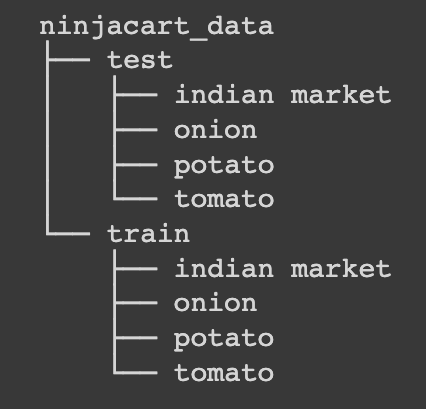




**Visualizing Images**

Now let's plot some random images from our Dataset from each class !

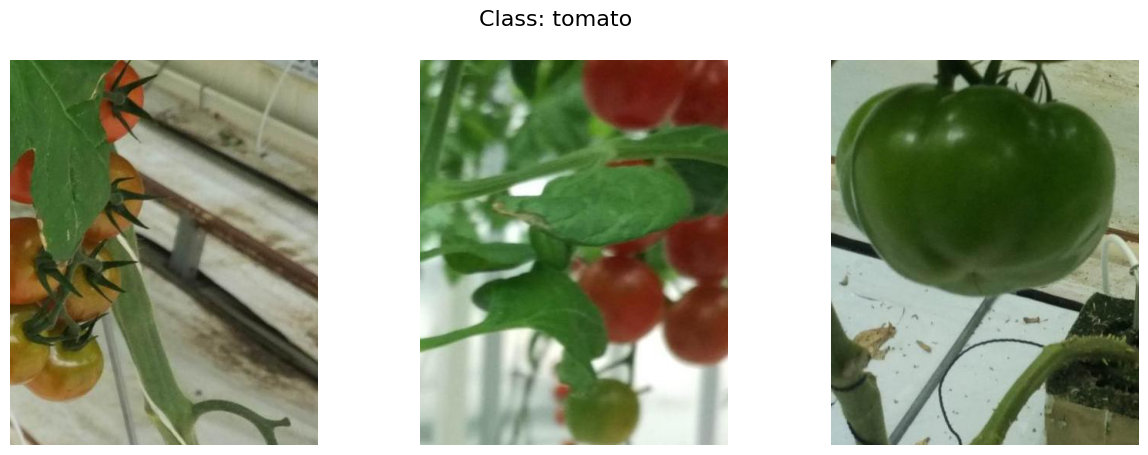

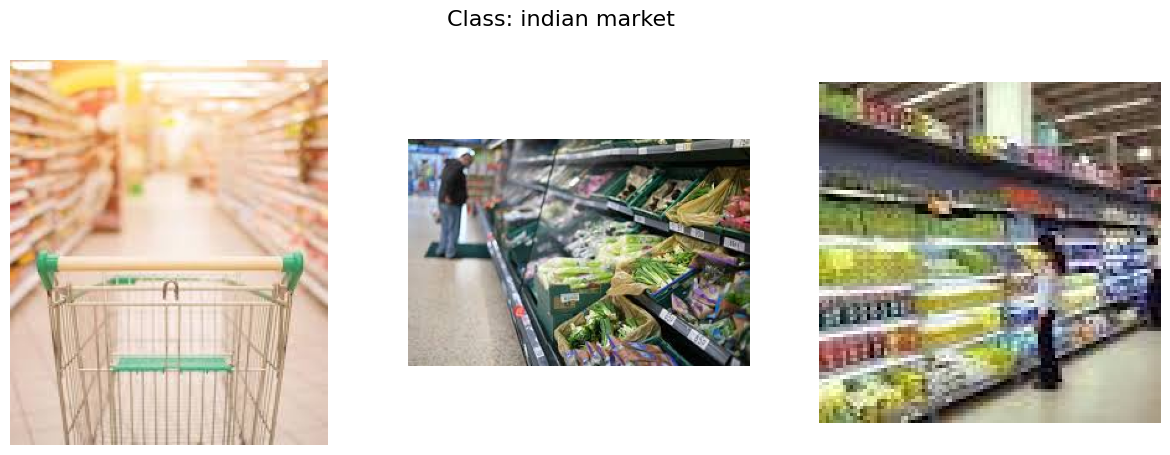

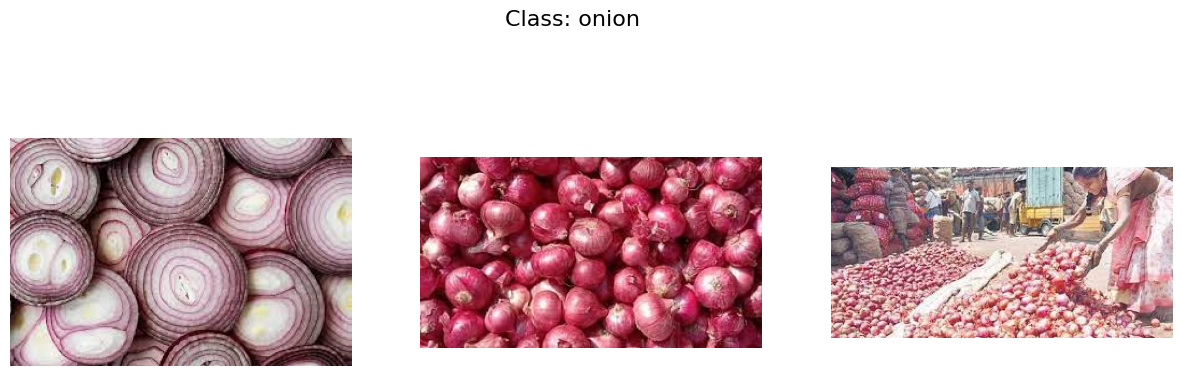

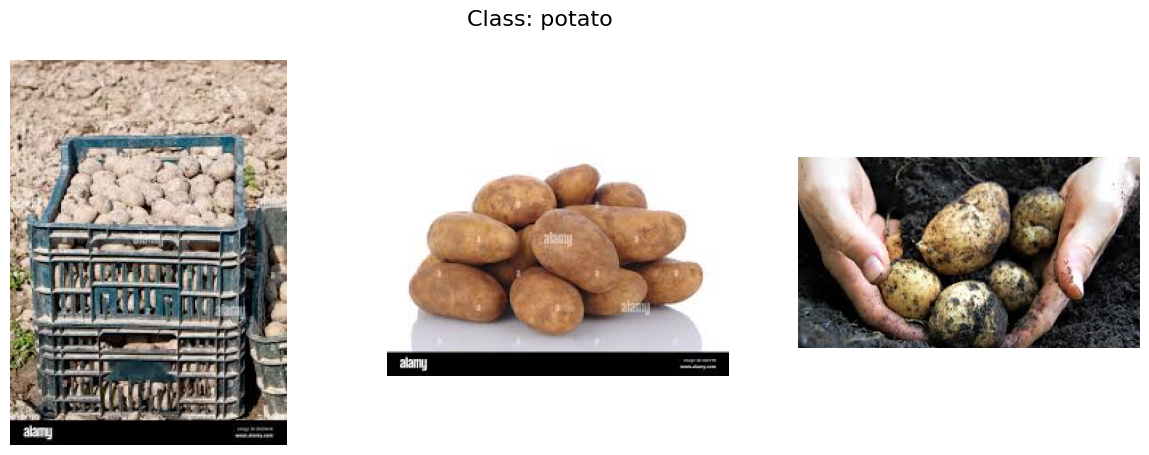

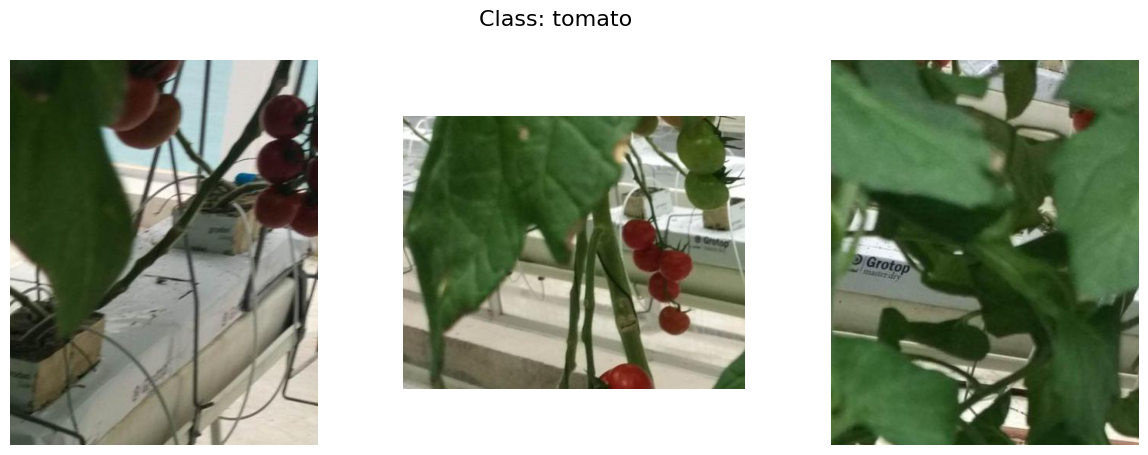

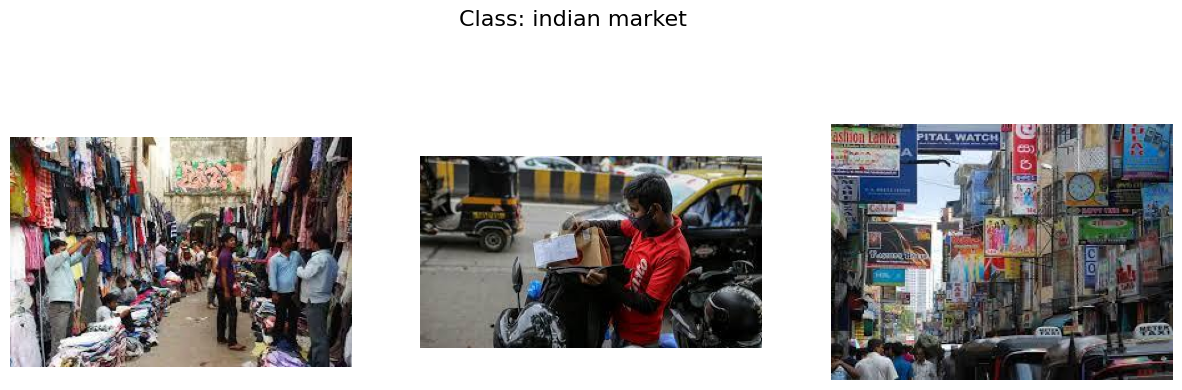

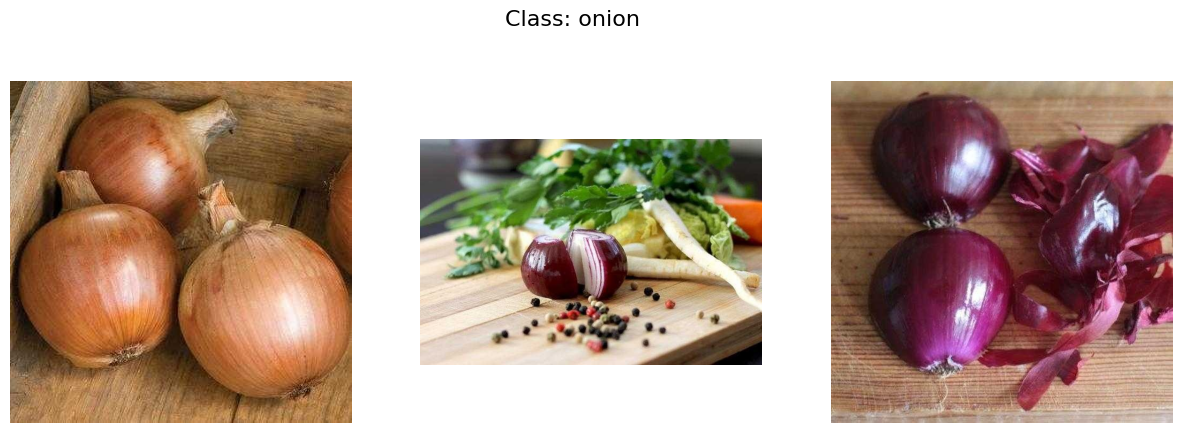

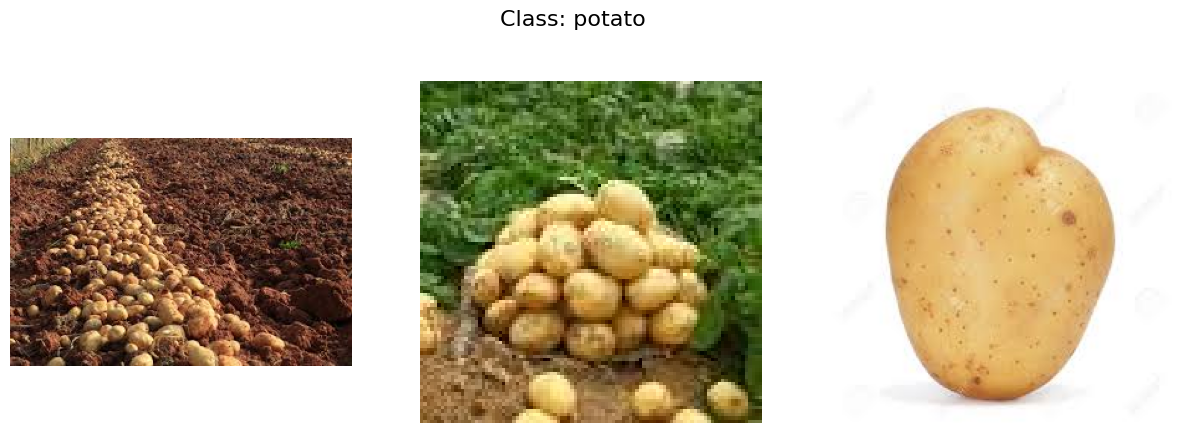

In [4]:
def view_images_by_class(directory, num_images_per_class=3):
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):  # Ensure it's a directory
            images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            selected_images = random.sample(images, min(num_images_per_class, len(images)))

            plt.figure(figsize=(15, 5))
            plt.suptitle(f"Class: {class_name}", fontsize=16)

            for i, image_name in enumerate(selected_images):
                image_path = os.path.join(class_dir, image_name)
                img = plt.imread(image_path)
                plt.subplot(1, num_images_per_class, i + 1)
                plt.imshow(img)
                plt.axis('off')  # Hide axes

            plt.show()

# Example usage (assuming train_dir and test_dir are defined)
view_images_by_class(train_dir)
view_images_by_class(test_dir)


**Insights:**

- Analyze how our Dataset consists of uneven sized images !
- We have some images of the market, which we will label as class 'noise'
- To feed this data into our models, we need to preprocess it

**Class Distribution Analysis:**

- Let's visualize how many samples of each class we have and if there's any class imbalance or not
- Plotting our Class distributions using our image_dict and count_dict which stores the images for each class along with its count
- We also feed our count_dict to a Dataframe to print the count for each class in our training and test directories

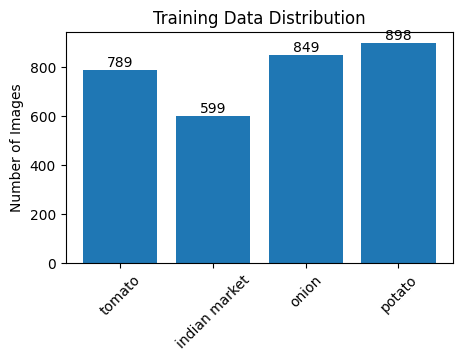


Training Data Distribution - Class Counts:
        Class  Count
       tomato    789
indian market    599
        onion    849
       potato    898


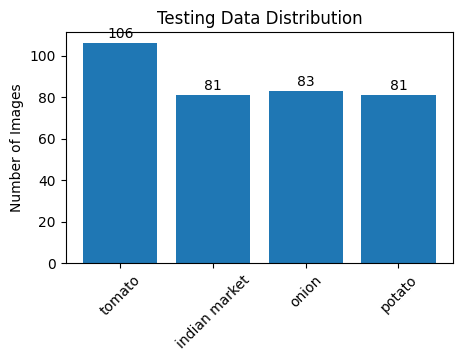


Testing Data Distribution - Class Counts:
        Class  Count
       tomato    106
indian market     81
        onion     83
       potato     81

Unique image sizes in training data: {(161, 314, 3), (320, 640, 3), (333, 640, 3), (480, 640, 3), (169, 299, 3), (173, 292, 3), (500, 482, 3), (612, 612, 3), (185, 272, 3), (195, 259, 3), (1107, 1476, 3), (189, 267, 3), (396, 379, 3), (401, 600, 3), (150, 200, 3), (462, 616, 3), (163, 310, 3), (253, 200, 3), (400, 400, 3), (192, 263, 3), (171, 295, 3), (178, 283, 3), (375, 250, 3), (167, 302, 3), (216, 234, 3), (217, 232, 3), (268, 188, 3), (580, 735, 3), (400, 600, 3), (187, 270, 3), (344, 612, 3), (210, 240, 3), (194, 260, 3), (100, 100, 3), (489, 640, 3), (280, 180, 3), (180, 279, 3), (750, 500, 3), (400, 500, 3), (184, 274, 3), (275, 183, 3), (640, 640, 3), (183, 276, 3), (815, 600, 3), (362, 500, 3), (162, 310, 3), (500, 400, 3), (273, 300, 3), (224, 225, 3), (472, 640, 3), (199, 253, 3), (162, 312, 3), (225, 224, 3), (512, 512, 3), (

In [5]:
def plot_class_distribution(directory, title):
    class_counts = [len(os.listdir(os.path.join(directory, cls)))
                   for cls in os.listdir(directory)]
    classes = os.listdir(directory)

    plt.figure(figsize=(5, 3))
    bars = plt.bar(classes, class_counts)
    plt.title(title)
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)

    # Add labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

    plt.show()

    # Print class counts as a table
    print(f"\n{title} - Class Counts:")
    df = pd.DataFrame({'Class': classes, 'Count': class_counts})
    print(df.to_string(index=False))


plot_class_distribution(train_dir, 'Training Data Distribution')
plot_class_distribution(test_dir, 'Testing Data Distribution')

# Check image dimensions
def analyze_image_sizes(directory):
    sizes = []
    for cls in os.listdir(directory):
        cls_dir = os.path.join(directory, cls)
        for img_file in os.listdir(cls_dir)[:100]:  # Check first 100 images
            img_path = os.path.join(cls_dir, img_file)
            img = plt.imread(img_path)
            sizes.append(img.shape)
    return sizes

train_sizes = analyze_image_sizes(train_dir)
unique_sizes = set(train_sizes)
print(f"\nUnique image sizes in training data: {unique_sizes}")


## **2.Data Preprocessing**

a. Irregular size treatment:

- Rescale image to range(0-1) and resize image to a square dimension
- Hint: Perform rescaling and resizing of the data

b. Class imbalance treatment:
- Use tensorflow function for rotating the images t odifferent angles for class with less samples.
- Use tensorflow function for random flipping the datasamples
- Hint: Use data augmentation


c. Plotting data:
- Verify the count of images in each train and test folder by plotting histogram.
- Check each folder to see if the number of images matches the reported number.
- Hint: Analysis for image data for each class

Now that we have analyzed and Explored our Raw Data, now to feed our Data into our model,

- Every image needs to be labelled according to its class and converted to a tensor.
- We will split our data into 3 sets : Train, Test and Validation
- For this task, we will use tf.keras.utils.image_dataset_from_directory, which will :

  - Create an (image, label) pair for every image

  - Automatically label the images using one-hot encoding

  - Eg : An image in the folder indian market will be labelled as [1, 0, 0, 0]
  - Since we have 4 classes, our classes will be one-hot encoded alphabetically,
  - Meaning our first class is indian market, fourth will be tomato.

- Batching (Grouping) images together according to batch_size

- Resize the Images to the shape (256, 256)

- Seed the shuffling of our images, so that it shuffles in a 'fixed' way which will be used to create our validation data Splitting 20% of our training data for validation
- Shuffling the data according to the seed

In [6]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4

# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training data flow
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data flow
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Test data flow
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nClass indices:", train_generator.class_indices)

Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.
Found 351 images belonging to 4 classes.

Class indices: {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3}


**Insights:**

- Specifying our Validation data, which we took from our train_ds specifying validation_split = 0.2
- Standardize image size to 224x224 (standard for transfer learning models)
- Use data augmentation for training set
- Split training data into 80% train / 20% validation
- Create separate generators for each dataset
- Note the class indices for reference

## **3. Model building**

a. Data Splitting:   
- The provided data does not contain separate training and validation folders.For us to do hyperparameter tuning of our models, it is important to divide the dataset into an 80-20 split for training and validation respectively.
- Hint: Before model building, split the dataset into training, validation set and test set.

b. CNNscratch:
- Use the tensorflow layer to find all the necessary functions to create your own model
- Use categorical loss and if the model is over fitting use batch normalization,
 dropout or simplify model
- Hint: Create your own CNN mode, Check for loss and overfitting

c. Pretrained model:
- Use a model of your choice (could be vgg, resnet, and mobilenet) and train it with appropriate batchsize.
- Using the pre-trained weights of popular networks is a greatway to do transfer learning since the size of our original dataset is small.
- Hint: Use transfer learning concept





In [7]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
print(cnn_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

None


**Insights:**

- Basic CNN architecture with increasing filters

- MaxPooling for dimensionality reduction

- Dropout layer to prevent overfitting

- Softmax output for multi-class classification

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 667ms/step - accuracy: 0.4752 - loss: 1.8725 - val_accuracy: 0.7035 - val_loss: 0.6873
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 54s 683ms/step - accuracy: 0.7604 - loss: 0.6436 - val_accuracy: 0.7340 - val_loss: 0.6428
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 600ms/step - accuracy: 0.8124 - loss: 0.4989 - val_accuracy: 0.7468 - val_loss: 0.5595
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 629ms/step - accuracy: 0.7844 - loss: 0.5408 - val_accuracy: 0.7644 - val_loss: 0.5333
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 637ms/step - accuracy: 0.8362 - loss: 0.4314 - val_accuracy: 0.7821 - val_loss: 0.4995
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 629ms/step - accuracy: 0.8340 - loss: 0.4364 - val_accuracy: 0.7901 - val_loss: 0.4661
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 75s 548ms/step - accuracy: 0.8368 - loss: 0.4134 - val_accuracy: 0.7596 - val_loss: 0.6484
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 637ms/step - accuracy: 0.8471 - loss: 0.4149 - val_accu

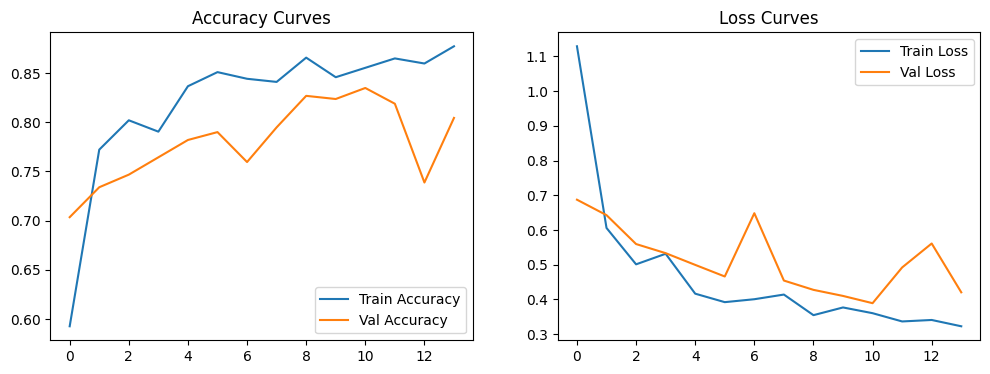

In [8]:
# Define callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint('best_cnn_model.keras', save_best_only=True),
    TensorBoard(log_dir='logs/cnn')
]

# Train model
history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.show()

plot_history(history)

**Insights:**

- Use EarlyStopping to prevent overfitting.
- Save best model using ModelCheckpoint.
- Track metrics with TensorBoard.
- Visualize training progress with accuracy/loss curves.

**Teansfer Learning with MobileNet**

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None
Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 671ms/step - accuracy: 0.4480 - loss: 1.3268 - val_accuracy: 0.8510 - val_loss: 0.4569
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 530ms/step - accuracy: 0.8591 - loss: 0.4246 - val_accuracy: 0.9054 - val_loss: 0.2976
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 563ms/step - accuracy: 0.9016 - loss: 0.3032 - val_accuracy: 0.9135 - val_loss: 0.2436
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 536ms/step - accuracy: 0.9097 - loss: 0.2334 - val_accuracy: 0.9263 - val_loss: 0.2304
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 546ms/step - accuracy: 0.9355 - loss: 0.1838 - val_accuracy: 0.9279 - val_loss: 0.2040
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 531ms/step - accuracy: 0.9423 - loss: 0.1769 - val_accuracy: 0.9343 - val_loss: 0.1991
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 550ms/step - accuracy: 0.9491 - loss: 0.1513 - val_accuracy: 0.9359 - val_loss: 0.1880
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 534ms/step - accuracy: 0.9513 - loss: 0.1412 - val

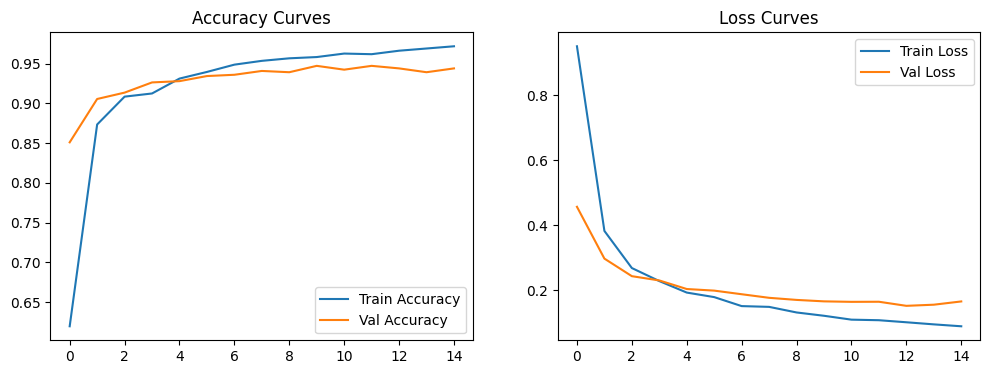

In [9]:
def create_transfer_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(224,224,3),
        include_top=False,
        weights='imagenet'
    )

    # Freeze base model layers
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

mobile_model = create_transfer_model()
print(mobile_model.summary())

# Train transfer model
history_transfer = mobile_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('best_mobilenet.keras', save_best_only=True),
        EarlyStopping(patience=2)
    ]
)

plot_history(history_transfer)

**Insights:**

- Use pre-trained MobileNetV2 as feature extractor.
- Add custom classification head.
- Lower learning rate for fine-tuning.
- GlobalAveragePooling instead of Flatten for better performance.
- Fewer epochs needed due to pre-trained weights.

In [10]:
# For CNN model
callbacks_cnn = [
    ModelCheckpoint('best_cnn_model.keras',
                  monitor='val_accuracy',
                  save_best_only=True,
                  mode='max',
                  ),
    # Other callbacks...
]

# For MobileNet
callbacks_mobilenet = [
    ModelCheckpoint('best_mobilenet.keras',
                  monitor='val_accuracy',
                  save_best_only=True,
                  mode='max',
                  ),
    # Other callbacks...
]



---


**VGG16 Model**

In [12]:
# VGG16 Model
def create_vgg16_model():
    # Load pre-trained VGG16 without top layers
    base_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model layers
    base_model.trainable = False

    # Add custom head
    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(4, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Training VGG16
vgg_model = create_vgg16_model()
vgg_model.summary()

# Callbacks
vgg_callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_vgg.keras', save_best_only=True),
    TensorBoard(log_dir='logs/vgg')
]

# Calculate class weights (add this section)
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Train
history_vgg = vgg_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=vgg_callbacks
)

# Fine-tuning
vgg_model.layers[0].trainable = True
for layer in vgg_model.layers[0].layers[:15]:  # Unfreeze last few layers
    layer.trainable = False

vgg_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg_finetune = vgg_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[ModelCheckpoint('best_vgg_tuned.keras', save_best_only=True)]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,092 (56.64 MB)

 Trainable params: 133,380 (521.02 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 632ms/step - accuracy: 0.4090 - loss: 1.3748 - val_accuracy: 0.5304 - val_loss: 1.1373
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 599ms/step - accuracy: 0.7368 - loss: 0.6355 - val_accuracy: 0.7548 - val_loss: 0.8899
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 608ms/step - accuracy: 0.8045 - loss: 0.4713 - val_accuracy: 0.8221 - val_loss: 0.6862
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 609ms/step - accuracy: 0.8341 - loss: 0.4399 - val_accuracy: 0.8429 - val_loss: 0.5404
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 605ms/step - accuracy: 0.8570 - loss: 0.3788 - val_accuracy: 0.8686 - val_loss: 0.4318
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 606ms/step - accuracy: 0.8566 - loss: 0.3532 - val_accuracy: 0.8814 - val_loss: 0.3636
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 595ms/step - accuracy: 0.8536 - loss: 0.3454 - val_accuracy: 0.8910 - val_loss: 0.3443
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 606ms/step - accuracy: 0.8684 - loss: 0.3230 - val_accu



---

**ResNet50 Model**

In [13]:
# ResNet50 Model
def create_resnet50_model():
    # Load pre-trained ResNet50 without top layers
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model layers
    base_model.trainable = False

    # Add custom head
    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(4, activation='softmax')
    ])

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Training ResNet50
resnet_model = create_resnet50_model()
resnet_model.summary()

# Callbacks
resnet_callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_resnet.keras', save_best_only=True),
    TensorBoard(log_dir='logs/resnet')
]

# Train
history_resnet = resnet_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=resnet_callbacks
)

# Fine-tuning
resnet_model.layers[0].trainable = True
for layer in resnet_model.layers[0].layers[:100]:  # Unfreeze last few layers
    layer.trainable = False

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_resnet_finetune = resnet_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[ModelCheckpoint('best_resnet_tuned.keras', save_best_only=True)]
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,121,476 (92.02 MB)

 Trainable params: 529,668 (2.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 69s 724ms/step - accuracy: 0.4088 - loss: 1.2712 - val_accuracy: 0.2885 - val_loss: 1.3390
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 588ms/step - accuracy: 0.5448 - loss: 1.0179 - val_accuracy: 0.3125 - val_loss: 1.2807
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 577ms/step - accuracy: 0.5758 - loss: 0.9547 - val_accuracy: 0.5000 - val_loss: 1.1774
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 593ms/step - accuracy: 0.5998 - loss: 0.8842 - val_accuracy: 0.5929 - val_loss: 1.0797
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 596ms/step - accuracy: 0.6282 - loss: 0.8526 - val_accuracy: 0.6282 - val_loss: 0.9931
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 594ms/step - accuracy: 0.6326 - loss: 0.8316 - val_accuracy: 0.6603 - val_loss: 0.9280
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 575ms/step - accuracy: 0.6330 - loss: 0.8007 - val_accuracy: 0.6603 - val_loss: 0.8709
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 583ms/step - accuracy: 0.6549 - loss: 0.8033 - val_accu

**Evaluation & Insights**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 452ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step


=== Model Comparison Table ===


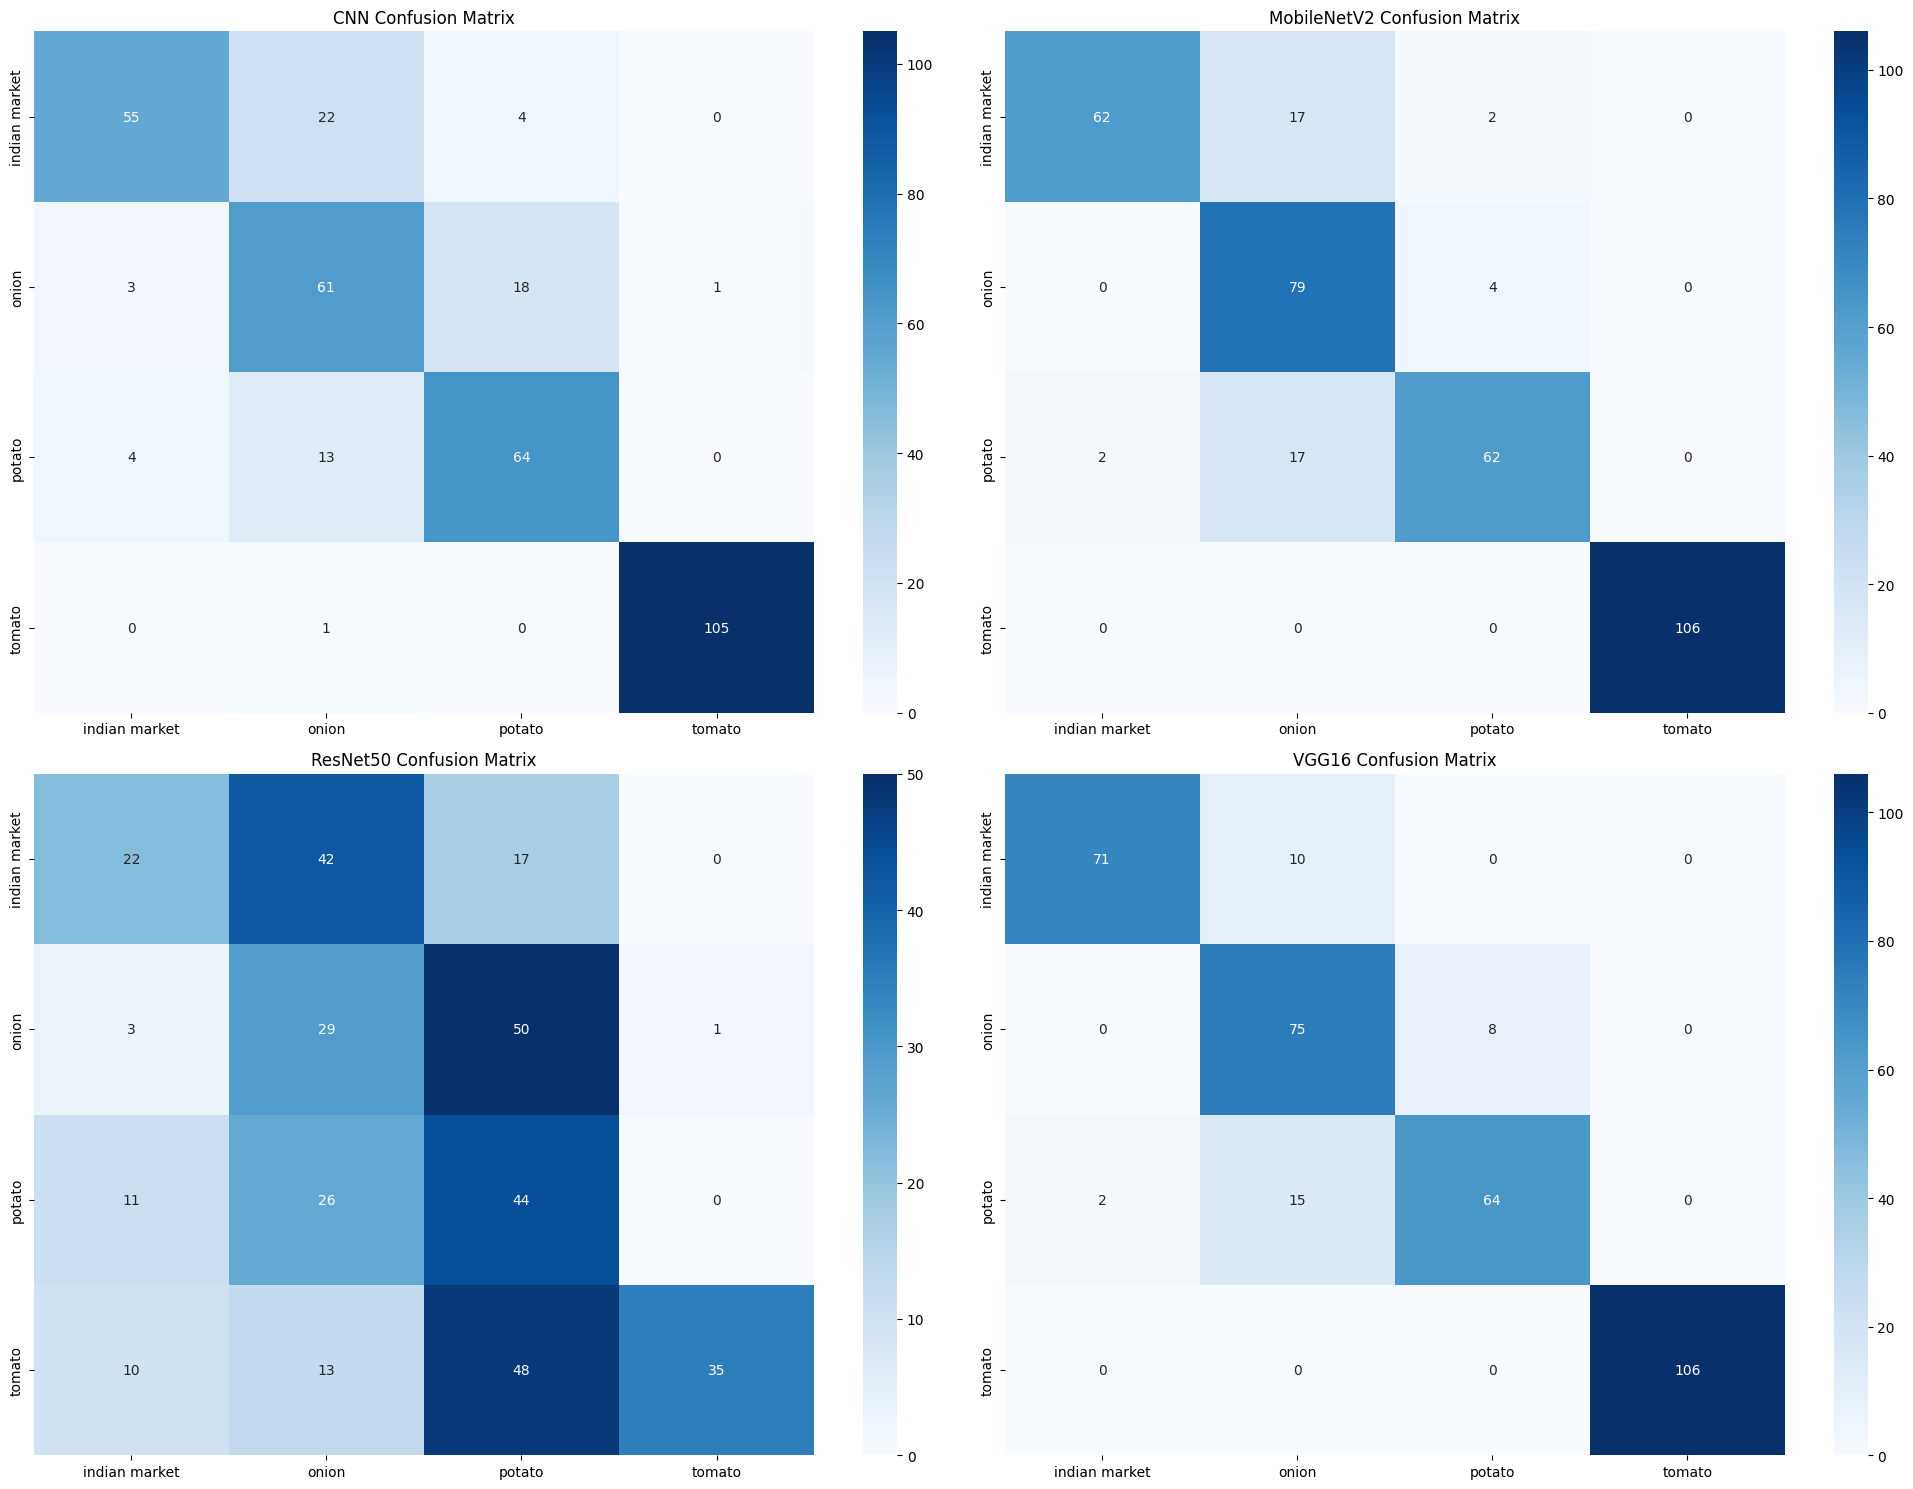

In [14]:
def evaluate_all_models(test_gen):
    models = {
        'CNN': 'best_cnn_model.keras',
        'MobileNetV2': 'best_mobilenet.keras',
        'ResNet50': 'best_resnet_tuned.keras',
        'VGG16': 'best_vgg_tuned.keras'
    }

    metrics = []
    plt.figure(figsize=(20, 15))

    for idx, (name, path) in enumerate(models.items()):
        try:
            # Load model
            model = tf.keras.models.load_model(path)

            # Evaluate
            loss, acc = model.evaluate(test_gen, verbose=0)
            preds = model.predict(test_gen)
            y_pred = np.argmax(preds, axis=1)
            y_true = test_gen.classes

            # Classification report
            report = classification_report(y_true, y_pred,
                                          target_names=test_gen.class_indices.keys(),
                                          output_dict=True)

            # Store metrics
            metrics.append({
                'Model': name,
                'Test Accuracy': f"{acc:.4f}",
                'Test Loss': f"{loss:.4f}",
                'Precision (Macro)': f"{report['macro avg']['precision']:.4f}",
                'Recall (Macro)': f"{report['macro avg']['recall']:.4f}",
                'F1 (Macro)': f"{report['macro avg']['f1-score']:.4f}",
                'Precision (Weighted)': f"{report['weighted avg']['precision']:.4f}",
                'Recall (Weighted)': f"{report['weighted avg']['recall']:.4f}",
                'F1 (Weighted)': f"{report['weighted avg']['f1-score']:.4f}"
            })

            # Confusion Matrix
            plt.subplot(2, 2, idx+1)
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=test_gen.class_indices.keys(),
                        yticklabels=test_gen.class_indices.keys())
            plt.title(f'{name} Confusion Matrix')

        except Exception as e:
            print(f"Error evaluating {name}: {str(e)}")
            continue

    # Display metrics
    metrics_df = pd.DataFrame(metrics)
    # Convert 'Test Accuracy' and 'Test Loss' columns to numeric
    metrics_df['Test Accuracy'] = pd.to_numeric(metrics_df['Test Accuracy'])
    metrics_df['Test Loss'] = pd.to_numeric(metrics_df['Test Loss'])

    print("\n\n=== Model Comparison Table ===")
    display(metrics_df.style
            .background_gradient(cmap='Blues', subset=['Test Accuracy'])
            .format({'Test Accuracy': '{:.2f}', 'Test Loss': '{:.4f}'}))

    plt.tight_layout()
    plt.show()

# Run evaluation
evaluate_all_models(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


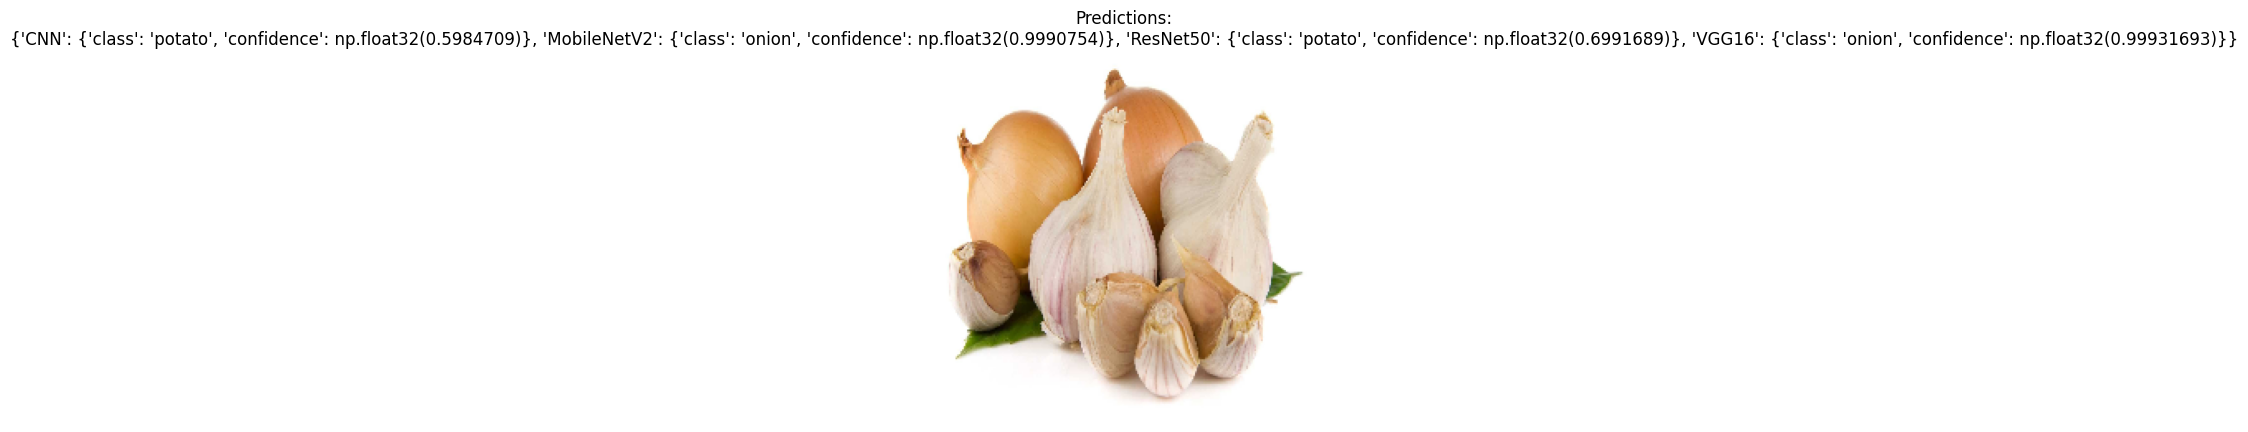

In [15]:
def predict_image_all_models(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.
    img_array = tf.expand_dims(img_array, 0)

    models = {
        'CNN': tf.keras.models.load_model('best_cnn_model.keras'),
        'MobileNetV2': tf.keras.models.load_model('best_mobilenet.keras'),
        'ResNet50': tf.keras.models.load_model('best_resnet_tuned.keras'),
        'VGG16': tf.keras.models.load_model('best_vgg_tuned.keras')
    }

    predictions = {}
    for model_name, model in models.items():
        pred = model.predict(img_array)
        class_idx = np.argmax(pred[0])
        confidence = np.max(pred[0])
        class_name = list(test_generator.class_indices.keys())[class_idx]
        predictions[model_name] = {'class': class_name, 'confidence': confidence}

    plt.imshow(img)
    plt.title(f"Predictions:\n{predictions}")
    plt.axis('off')
    plt.show()

# Example usage with test image
test_image_path = 'dataset/ninjacart_data/test/onion/0920GHDV72AQ.jpg'
predict_image_all_models(test_image_path)

## **4. Results Interpretation & Stakeholder Presentation**

a. Interpret the model performance:
- Obtain the testing accuracy to see how well your model generalizes.
- Compare and check the performance of multiple models using a confusion matrix.
- Hint: Test Accuracy

b. Visual Representations:
- Implement a TensorBoard callback to log each of our model metrics for each model during the trainingprocess. [ recommended google colab or jupyternotebook]
- Plot the train/valid accuracy and loss graph for each model.
- Hint: Visuals can often convey information more effectively than numbers alone.

c. Feedback Loop
- If the model is still overfitting, Try to tune your model by applying-:
  - BatchNormalization and  Dropout
  - Callbacks: EarlyStopping, ModelCheckpoint and TensorBoard callback
  - Data Augmentation
- Hint: It's essential to ensure continuous monitoring and adaptability.


**Insights:**

1. Business Context & Problem Statement

  - The case study involves Ninjacart, which aims to streamline its fresh produce supply chain using Computer Vision.

  - The objective is to develop a robust classifier to distinguish between different vegetable images and filter out noisy (irrelevant) images.

2. Dataset Analysis

  - The dataset consists of 3,135 images categorized into four classes: different vegetables and noise.

  - Image preprocessing techniques like resizing, normalization, and augmentation are likely used to improve model performance.

3. Data Preprocessing and Augmentation

  - Images were resized to a fixed dimension before feeding them into the model.

  - Normalization was applied to scale pixel values.

  - Augmentation techniques such as rotation, flipping, and brightness adjustments were used to enhance model robustness.

4. Model Selection & Training

  - A Convolutional Neural Network (CNN) was implemented as the primary model.

  - Transfer learning approaches using ResNet and EfficientNet were explored to improve classification accuracy.

  - Hyperparameter tuning was performed by adjusting batch size, learning rate, and the number of epochs.

5. Performance Evaluation

  - The CNN model achieved a good classification accuracy, but some misclassifications were observed.

  - The confusion matrix revealed that certain vegetables were misclassified due to similarity in appearance.

  - The model had difficulty distinguishing between vegetable categories and noisy images in some cases.



**Recommendations:**

- Introduce more augmentations such as rotation, zoom, brightness adjustments, and elastic transformations to improve generalization.

- Ensure augmentation is applied evenly across all classes to maintain balance.

- Fine-tune these models instead of training from scratch to improve accuracy.

- Use anomaly detection techniques or an additional model to filter out images that do not belong to any category.

- If certain classes have fewer images, apply techniques like SMOTE or class-weighted loss functions to address imbalance.

- Collect more images or perform targeted augmentation for underrepresented classes.

- Experiment with different CNN architectures and deeper networks to enhance feature extraction.

- Test with real-world images from Ninjacart’s environment to evaluate robustness before final integration.